In [5]:
#Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.model_selection import RandomizedSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing dataset
df=pd.read_csv("cirrhosis.csv")
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [7]:
#EDA(Exploratory data analysis)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [8]:
df.head(15)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [9]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [10]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [11]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [12]:
#feature engineering
#Imputing missing values in numerical features
columns_to_fill_1 = ['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides',
                    'Platelets','Prothrombin','Stage']
imputer1 = SimpleImputer(strategy='median')
df[columns_to_fill_1]=imputer1.fit_transform(df[columns_to_fill_1])

#Imputing missing values in categorical features
columns_to_fill_2 = ['Drug','Ascites','Hepatomegaly','Spiders']
imputer2 = SimpleImputer(strategy='most_frequent')
df[columns_to_fill_2]=imputer2.fit_transform(df[columns_to_fill_2])

In [13]:
df.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [14]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,D-penicillamine,24472,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,415,1103,C,D-penicillamine,14245,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,416,1055,C,D-penicillamine,20819,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,417,691,C,D-penicillamine,21185,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


In [15]:
df.drop(['ID'],axis=1,inplace=True)

In [16]:
cases=df['Status'].value_counts()
cases

Status
C     232
D     161
CL     25
Name: count, dtype: int64

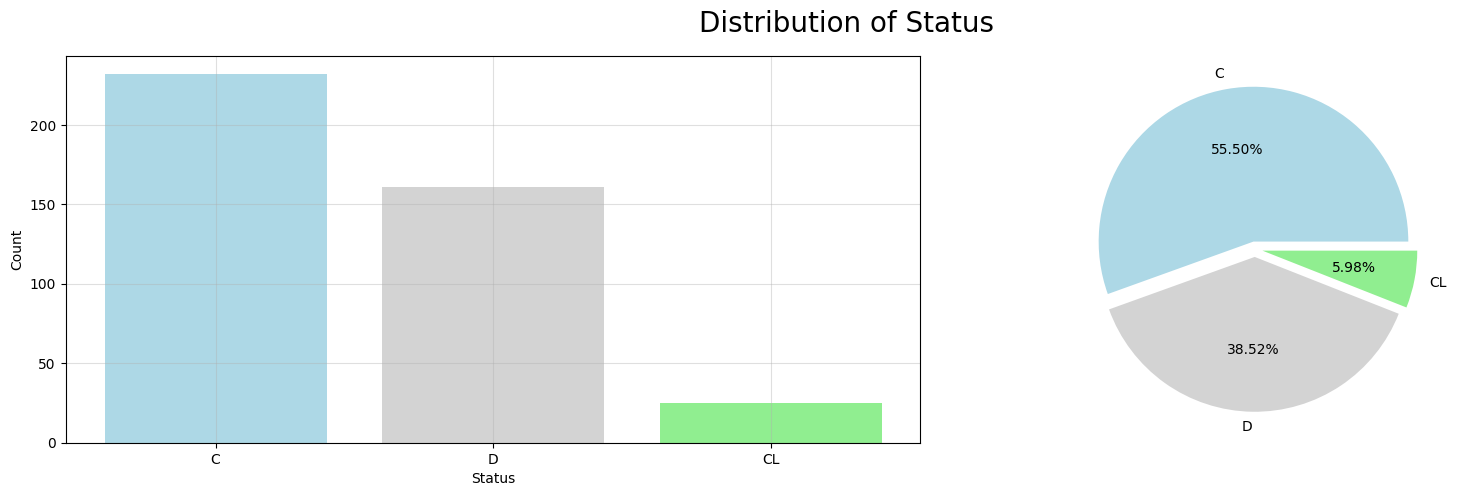

In [17]:
#Data visualization
#Target visualization


colors=['lightblue','lightgray','lightgreen']
cases=df['Status'].value_counts()

#create a two-subplots
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,5))

#Bar chart on first subplot
ax1.bar(x=cases.index,height=cases.values,color=colors)
ax1.set_xlabel('Status')
ax1.set_ylabel('Count')
ax1.grid(alpha=0.4)

#piechart for second subplot
ax2.pie(cases.values,labels=cases.index,explode=([0.05] * len(cases.index)),colors=colors,autopct='%.2f%%')

#Configure overall layout
fig.suptitle('Distribution of Status',fontsize=20)
plt.tight_layout(pad=1)
plt.show()


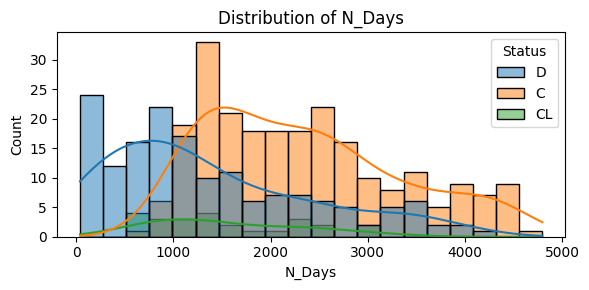

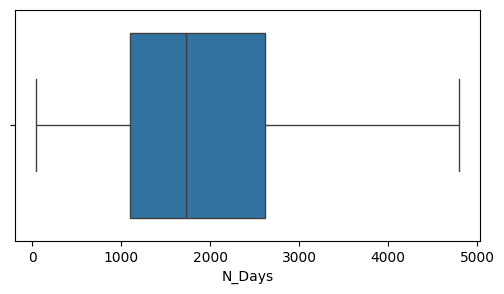

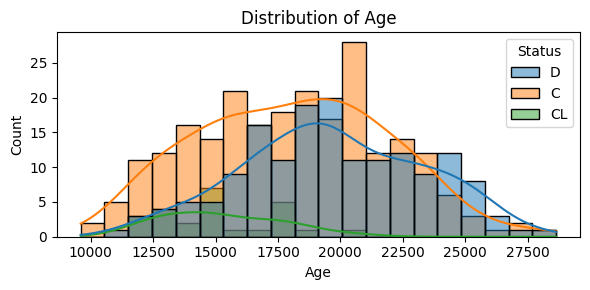

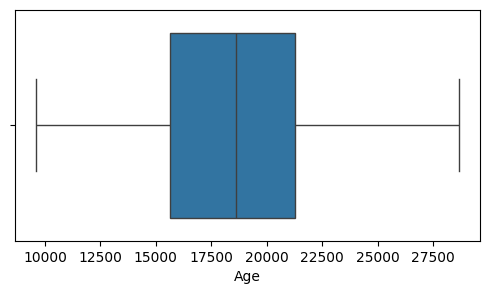

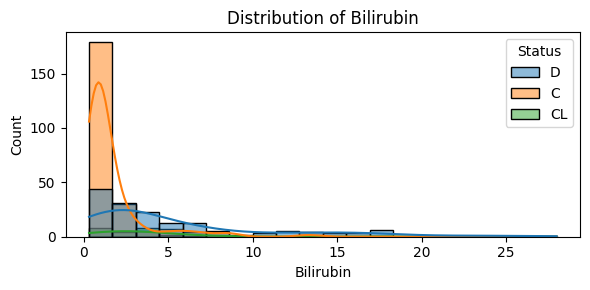

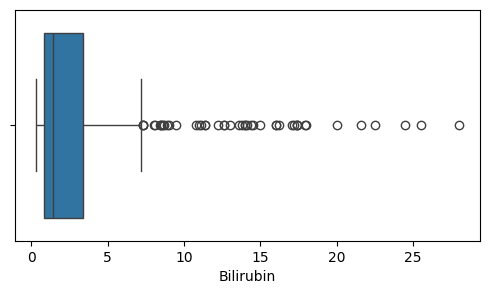

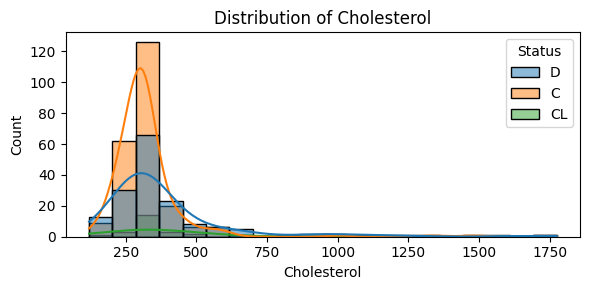

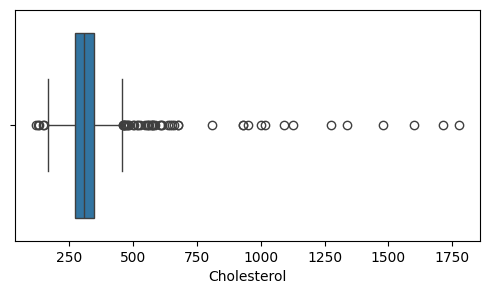

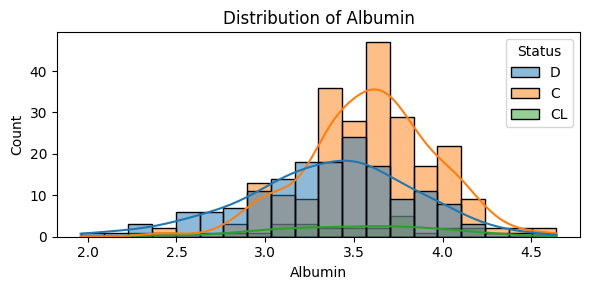

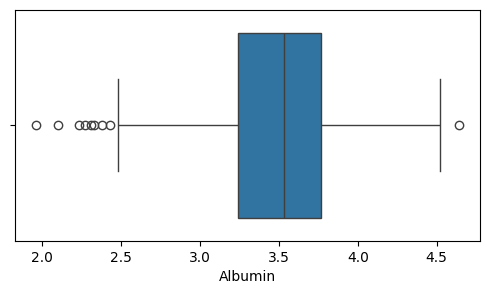

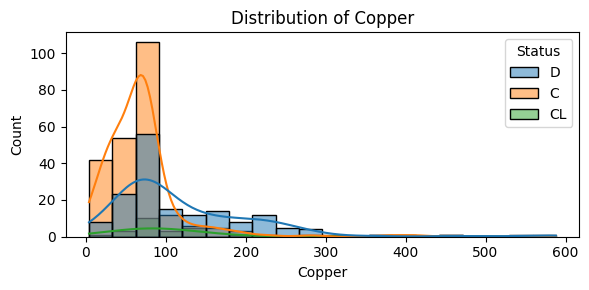

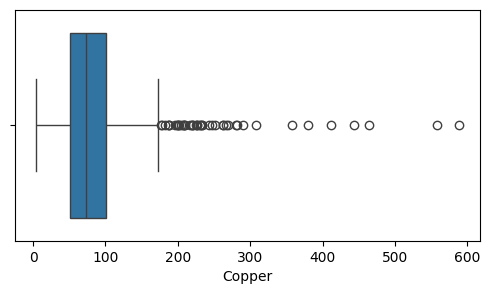

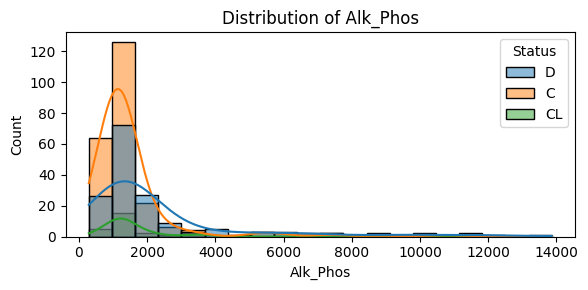

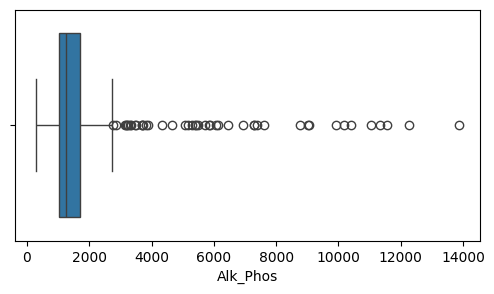

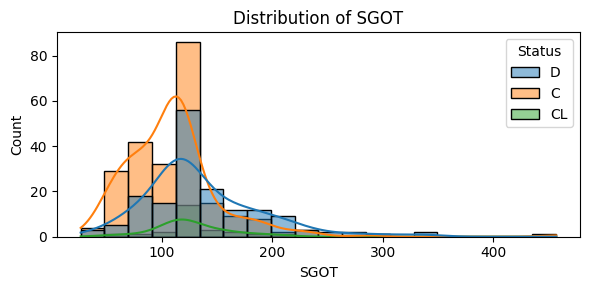

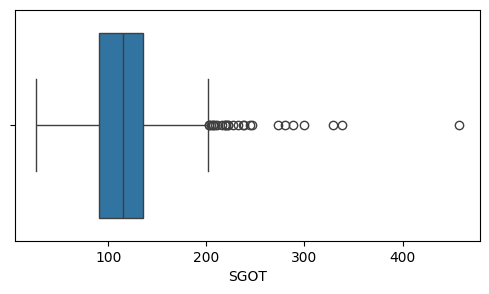

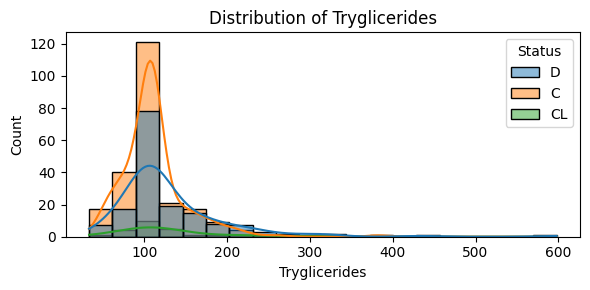

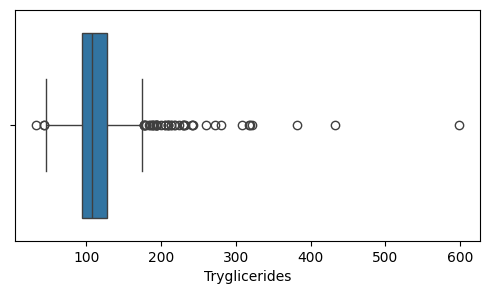

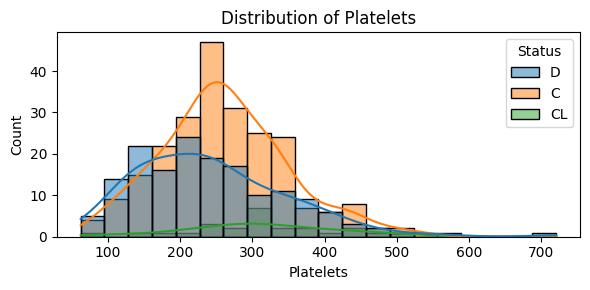

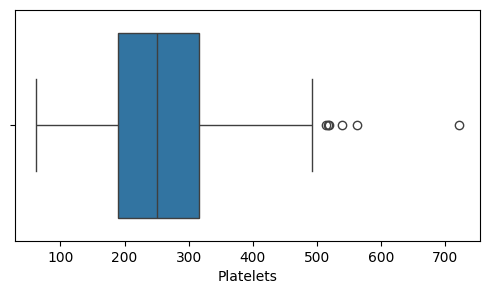

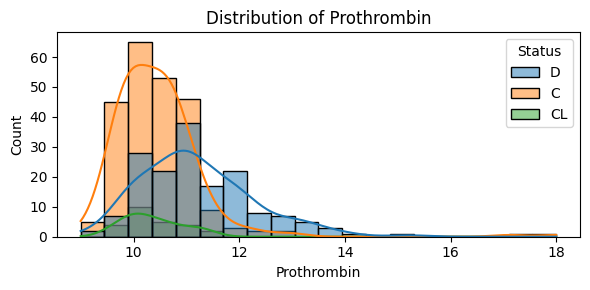

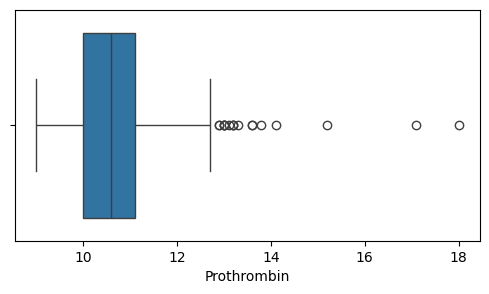

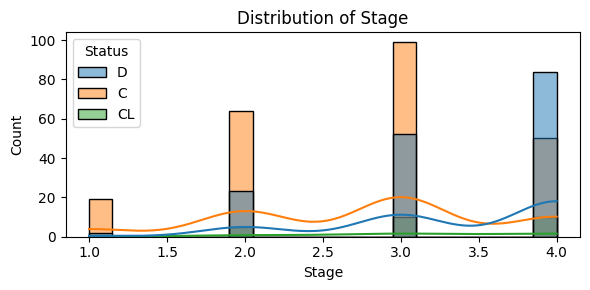

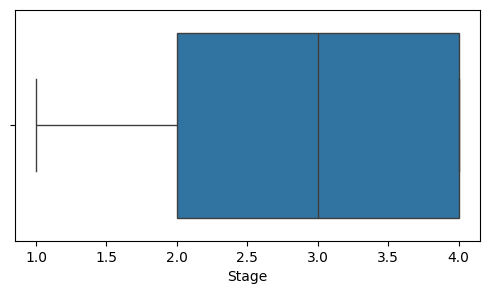

In [18]:
#numerical features visualization

numerical_columns = ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides',
                     'Platelets','Prothrombin','Stage']

#create a bar plot
for columns in numerical_columns:
 plt.figure(figsize=(6,3))
 sns.histplot(data=df,x=columns,hue='Status',label='Status',bins=20,kde=True,color='Blue')
 plt.xlabel(columns)
 plt.ylabel('Count')
 plt.title(f"Distribution of {columns}")
 plt.tight_layout()
 plt.show()
 plt.figure(figsize=(6,3))
 sns.boxplot(data=df,x=columns)
 plt.show()
    
  


The distributions of the features Bilirubin, Cholesterol, Copper, Alkaline Phosphatase, SGOT, Tryglicerides and Prothrombin are highly skewed.
As a result, they are more prone to having outliers which is clearly indicated by their respective box plots.

In [19]:
#categorical features visualization

def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(6,3))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()

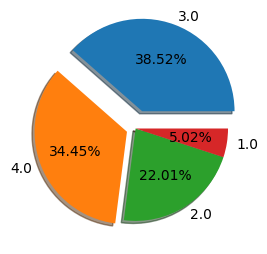

In [20]:
pie_chart(df,'Stage')

The largest portion of patients suffered from 3rd stage Cirrhosis, constituting nearly 38% of the total, with 4th stage cases closely trailing at approximately 35%. Those in the 2nd stage accounted for just over one-fifth of the total, while only a small fraction of the share was attributed to 1st stage patients.


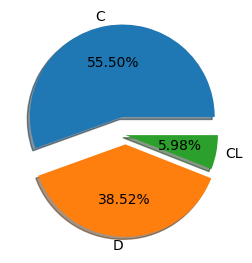

In [21]:
pie_chart(df,'Status')



A notable segment of the patient population held a status labeled as "Censored," making up slightly over half of the overall distribution. This group was trailed by patients who passed away during the clinical trials, comprising just under 40% of the total. A minimal fraction of the share, slightly surpassing 5%, consisted of patients designated as "Censored due to Liver transplantation."

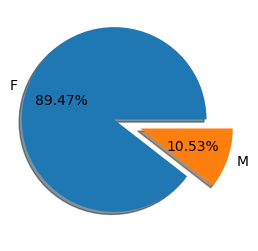

In [22]:
pie_chart(df,'Sex')

An overwhelming majority of the patient population consists of females, accounting for a significant portion of nearly 90%. Conversely, males constituted slightly more than one-tenth of the total distribution.

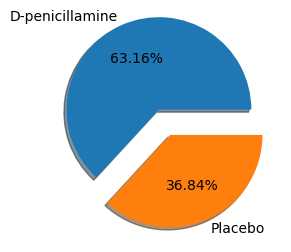

In [23]:
pie_chart(df,'Drug')


Both the drugs D-penicillamine and Placebo, recorded an equal amount of usage during the clinical trials.

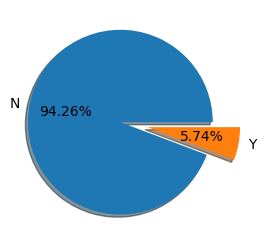

In [24]:
pie_chart(df,'Ascites')

Only a small fraction of the population of patients had Ascites disease

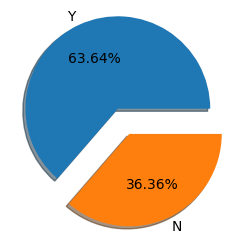

In [25]:
pie_chart(df,'Hepatomegaly')

Over 60% of individuals are affected by hepatomegaly, comprising a majority of the population share.

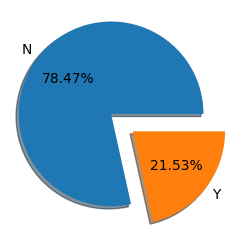

In [26]:
pie_chart(df,'Spiders')

The majority of patients lacked spider, accounting for just over 70% of the overall distribution.

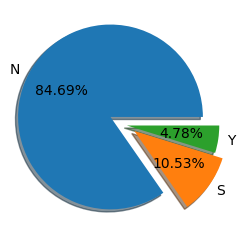

In [27]:
pie_chart(df,'Edema')

The overwhelming majority of patients did not experience edema or undergo diuretic therapy for it, making up nearly 85% of the total distribution. Patients who either had edema without diuretics or had it resolved by diuretics constituted just over one-tenth, while those who had edema despite receiving diuretic therapy had a minimal share of slightly under 5%.






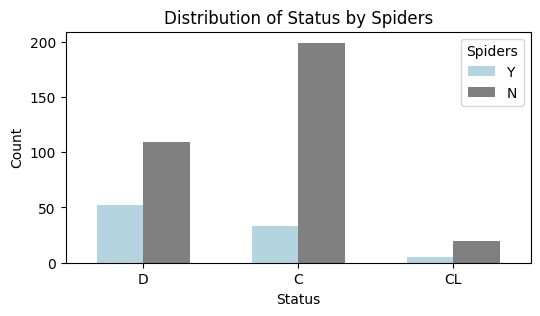

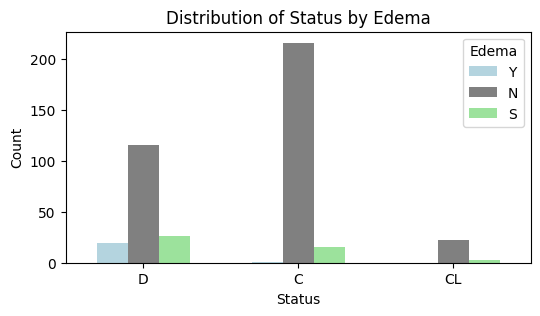

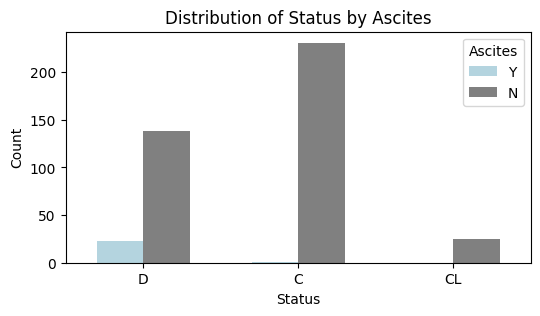

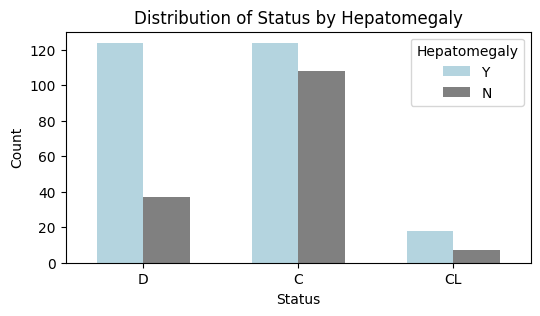

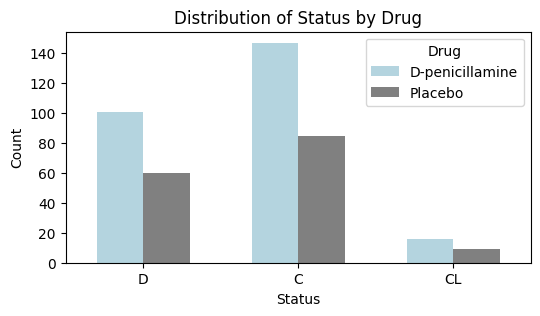

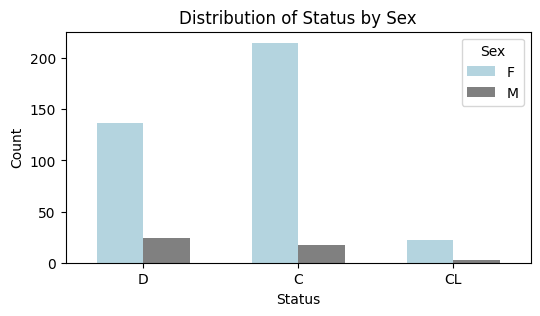

In [28]:
#Distribution of features VS Target 

columns_to_plot={'Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema'}
palette = sns.color_palette(['lightblue','grey','lightgreen'])

for columns in columns_to_plot:
    plt.figure(figsize=(6,3))
    sns.countplot(x='Status',data=df,hue=columns,width=0.6,palette=palette)
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.title(f'Distribution of Status by {columns}')
    plt.show()
    

In [29]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']

In [30]:
round(males.Status.value_counts() / len(males) * 100,2)

Status
D     54.55
C     38.64
CL     6.82
Name: count, dtype: float64

In [31]:
round(females.Status.value_counts() / len(females) * 100,2)

Status
C     57.49
D     36.63
CL     5.88
Name: count, dtype: float64

Male patients are more prone to death in comparison to females while female patients are more likely to have "Censored" status.

In [32]:
round(males.Stage.value_counts() / len(males) * 100,2)

Stage
4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: count, dtype: float64

In [33]:
round(females.Stage.value_counts() / len(females) * 100,2)

Stage
3.0    38.77
4.0    33.96
2.0    22.46
1.0     4.81
Name: count, dtype: float64

Male patients are highly vulnerable to the critical stages (i.e. 3rd and 4th) of the Cirrhosis disease as compared to female patients.

In [34]:
#Treatment of outliers
cols_to_treat = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides',
                     'Platelets','Prothrombin']
for col in cols_to_treat:
    lower_limit, upper_limit = df[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower = lower_limit - 1.5 * IQR
    upper = upper_limit + 1.5 * IQR
    df[col] = np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))


In [35]:
#feature engineering
#Encoding categorical features

le = LabelEncoder()
df['Status']= le.fit_transform(df['Status']) 
df['Status'].unique() 

#ordinal encoding of Status and Edema Variables
columns_to_encode_1 = ['Edema']
oe = OrdinalEncoder(categories=[['Y','S','N']])     
oetransform = oe.fit_transform(df[columns_to_encode_1])
df[columns_to_encode_1]=oetransform

# one hot encoding on categorical features
columns_to_encode_2 = ['Drug','Sex','Ascites','Hepatomegaly','Spiders']
ohe = OneHotEncoder(sparse_output=False,drop='first')
ohetransform = ohe.fit_transform(df[columns_to_encode_2])
ohetransform_df=pd.DataFrame(ohetransform,columns=ohe.get_feature_names_out(columns_to_encode_2))

df_1=pd.concat([df,ohetransform_df],axis=1)
df_1


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y
0,400,2,D-penicillamine,21464,F,Y,Y,Y,0.0,7.3,...,137.95,172.0,190.0,12.2,4.0,0.0,0.0,1.0,1.0,1.0
1,4500,0,D-penicillamine,20617,F,N,Y,Y,2.0,1.1,...,113.52,88.0,221.0,10.6,3.0,0.0,0.0,0.0,1.0,1.0
2,1012,2,D-penicillamine,25594,M,N,N,N,1.0,1.4,...,96.10,55.0,151.0,12.0,4.0,0.0,1.0,0.0,0.0,0.0
3,1925,2,D-penicillamine,19994,F,N,Y,Y,1.0,1.8,...,60.63,92.0,183.0,10.3,4.0,0.0,0.0,0.0,1.0,1.0
4,1504,1,Placebo,13918,F,N,Y,Y,2.0,3.4,...,113.15,72.0,136.0,10.9,3.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,2,D-penicillamine,24472,F,N,Y,N,2.0,1.2,...,114.70,108.0,174.0,10.9,3.0,0.0,0.0,0.0,1.0,0.0
414,1103,0,D-penicillamine,14245,F,N,Y,N,2.0,0.9,...,114.70,108.0,180.0,11.2,4.0,0.0,0.0,0.0,1.0,0.0
415,1055,0,D-penicillamine,20819,F,N,Y,N,2.0,1.6,...,114.70,108.0,143.0,9.9,3.0,0.0,0.0,0.0,1.0,0.0
416,691,0,D-penicillamine,21185,F,N,Y,N,2.0,0.8,...,114.70,108.0,269.0,10.4,3.0,0.0,0.0,0.0,1.0,0.0


In [36]:
df_1.drop(['Drug','Sex','Ascites','Hepatomegaly','Spiders'],axis=1,inplace=True)

In [37]:
df_1.head()

,N_Days,Status,Age,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y
0,400,2,21464,0.0,7.3,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0.0,0.0,1.0,1.0,1.0
1,4500,0,20617,2.0,1.1,302.0,4.14,54.0,2745.0,113.52,88.0,221.0,10.6,3.0,0.0,0.0,0.0,1.0,1.0
2,1012,2,25594,1.0,1.4,176.0,3.48,175.0,516.0,96.10,55.0,151.0,12.0,4.0,0.0,1.0,0.0,0.0,0.0
3,1925,2,19994,1.0,1.8,244.0,2.54,64.0,2745.0,60.63,92.0,183.0,10.3,4.0,0.0,0.0,0.0,1.0,1.0
4,1504,1,13918,2.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1.0,0.0,0.0,1.0,1.0


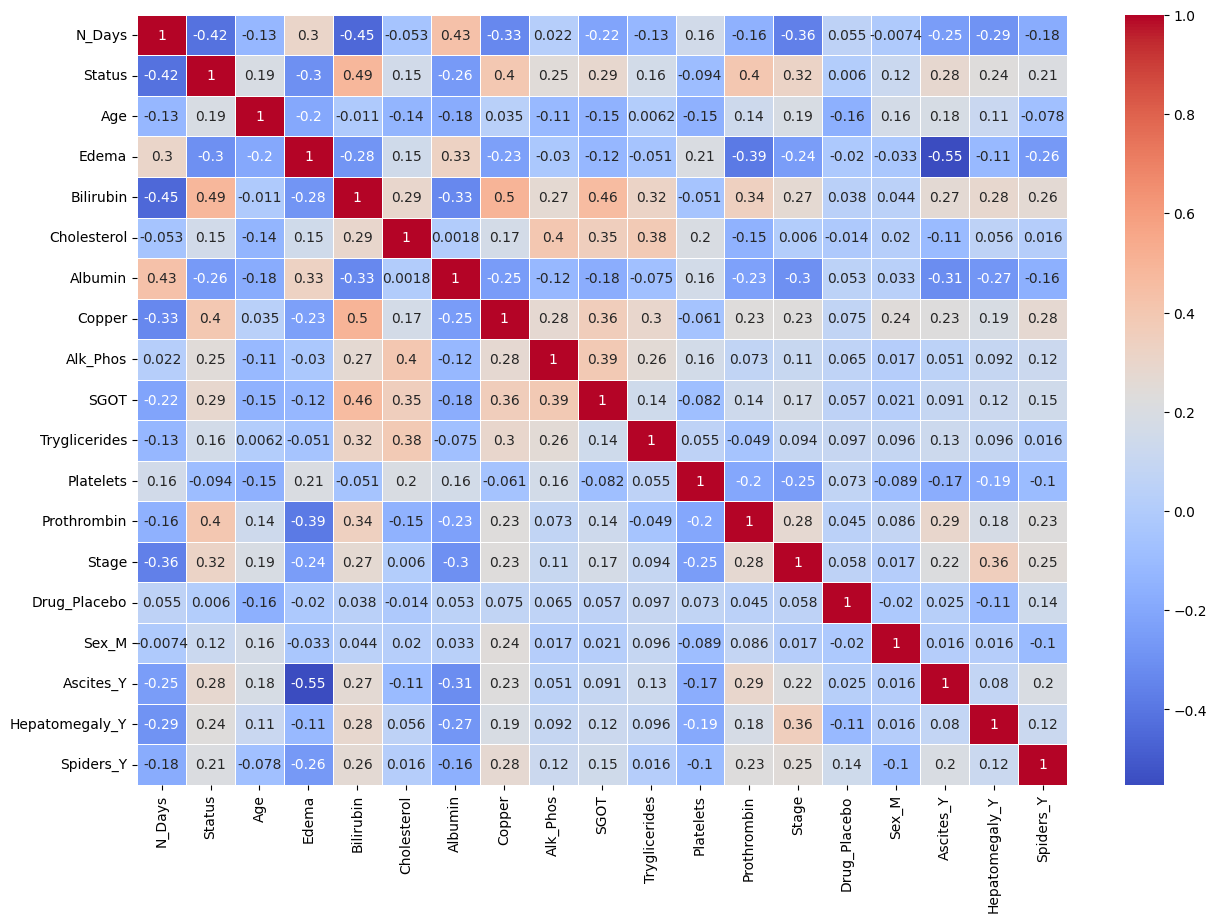

In [38]:
#visualization of features correlation
correlation_matrix = df_1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.show()

In [39]:
df_1['Age'] = (df_1['Age']/365.0).round()
df_1

,N_Days,Status,Age,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y
0,400,2,59.0,0.0,7.3,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0.0,0.0,1.0,1.0,1.0
1,4500,0,56.0,2.0,1.1,302.0,4.14,54.0,2745.0,113.52,88.0,221.0,10.6,3.0,0.0,0.0,0.0,1.0,1.0
2,1012,2,70.0,1.0,1.4,176.0,3.48,175.0,516.0,96.10,55.0,151.0,12.0,4.0,0.0,1.0,0.0,0.0,0.0
3,1925,2,55.0,1.0,1.8,244.0,2.54,64.0,2745.0,60.63,92.0,183.0,10.3,4.0,0.0,0.0,0.0,1.0,1.0
4,1504,1,38.0,2.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,2,67.0,2.0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0,0.0,0.0,0.0,1.0,0.0
414,1103,0,39.0,2.0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0,0.0,0.0,0.0,1.0,0.0
415,1055,0,57.0,2.0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0,0.0,0.0,0.0,1.0,0.0
416,691,0,58.0,2.0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0,0.0,0.0,0.0,1.0,0.0


We will drop 'N_days'

In [40]:

df_1.drop(['N_Days'],axis=1,inplace=True)
df_1

,Status,Age,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y
0,2,59.0,0.0,7.3,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0.0,0.0,1.0,1.0,1.0
1,0,56.0,2.0,1.1,302.0,4.14,54.0,2745.0,113.52,88.0,221.0,10.6,3.0,0.0,0.0,0.0,1.0,1.0
2,2,70.0,1.0,1.4,176.0,3.48,175.0,516.0,96.10,55.0,151.0,12.0,4.0,0.0,1.0,0.0,0.0,0.0
3,2,55.0,1.0,1.8,244.0,2.54,64.0,2745.0,60.63,92.0,183.0,10.3,4.0,0.0,0.0,0.0,1.0,1.0
4,1,38.0,2.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,67.0,2.0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0,0.0,0.0,0.0,1.0,0.0
414,0,39.0,2.0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0,0.0,0.0,0.0,1.0,0.0
415,0,57.0,2.0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0,0.0,0.0,0.0,1.0,0.0
416,0,58.0,2.0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0,0.0,0.0,0.0,1.0,0.0


In [41]:
#train-test-split
x=df_1.drop(['Status'],axis=1)
y=df_1['Status']

Model Traning and Evaluation

In [42]:
#train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [43]:
x_train

,Age,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y
70,49.0,2.0,1.2,258.0,3.57,79.0,2201.0,120.900,76.000,410.0,11.5,4.0,1.0,0.0,0.0,1.0,0.0
131,41.0,2.0,1.9,448.0,3.83,60.0,1052.0,127.100,175.000,181.0,9.8,3.0,0.0,0.0,0.0,0.0,0.0
17,54.0,0.0,7.3,178.0,2.80,175.0,961.0,202.875,176.875,283.0,12.4,4.0,0.0,0.0,0.0,1.0,1.0
287,49.0,1.0,7.3,310.0,3.89,107.0,637.0,117.000,176.875,298.0,9.6,2.0,1.0,0.0,0.0,1.0,0.0
295,31.0,2.0,0.8,328.0,3.31,62.0,1105.0,137.000,95.000,293.0,10.9,4.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,50.0,2.0,7.3,309.5,3.36,73.0,1259.0,114.700,108.000,384.0,10.0,3.0,0.0,0.0,0.0,1.0,0.0
320,61.0,1.0,1.3,309.5,3.41,73.0,1259.0,114.700,108.000,259.0,10.9,4.0,0.0,1.0,0.0,1.0,0.0
15,40.0,2.0,0.7,204.0,3.66,28.0,685.0,72.850,58.000,198.0,10.8,3.0,1.0,0.0,0.0,0.0,0.0
125,54.0,2.0,1.2,269.0,3.12,73.0,1441.0,165.850,68.000,166.0,11.1,4.0,0.0,0.0,1.0,1.0,1.0


In [44]:
x_test

,Age,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y
362,44.0,2.0,0.6,309.500,3.50,73.0,1259.0,114.70,108.000,150.0,9.9,3.0,0.0,0.0,0.0,1.0,0.0
154,44.0,1.0,0.6,220.000,3.35,57.0,1620.0,153.45,80.000,311.0,11.2,4.0,1.0,0.0,0.0,1.0,1.0
47,49.0,2.0,1.9,259.000,3.70,175.0,2745.0,188.34,176.875,214.0,11.0,3.0,1.0,1.0,0.0,0.0,0.0
100,45.0,2.0,0.9,400.000,3.60,31.0,1689.0,164.30,166.000,327.0,10.4,3.0,1.0,0.0,0.0,0.0,0.0
187,63.0,2.0,0.7,187.000,3.48,41.0,654.0,120.90,98.000,164.0,11.0,4.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,38.0,2.0,2.2,459.875,3.77,77.0,2520.0,92.00,114.000,309.0,9.5,4.0,0.0,0.0,0.0,0.0,0.0
218,43.0,2.0,1.6,215.000,4.17,67.0,936.0,134.85,85.000,176.0,9.6,3.0,1.0,0.0,0.0,0.0,0.0
29,41.0,2.0,3.6,260.000,2.54,172.0,2745.0,121.26,158.000,124.0,11.0,4.0,1.0,0.0,0.0,1.0,1.0
279,46.0,2.0,1.6,325.000,3.69,69.0,2583.0,142.00,140.000,284.0,9.6,3.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#feature Scaling 
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [46]:
x_train

array([[-0.20421991,  0.40389175, -0.57603419, ..., -0.2244097 ,
         0.7326951 , -0.52981294],
       [-0.98118688,  0.40389175, -0.2811647 , ..., -0.2244097 ,
        -1.3648242 , -0.52981294],
       [ 0.28138444, -3.59395199,  1.99354282, ..., -0.2244097 ,
         0.7326951 ,  1.88745861],
       ...,
       [-1.07830775,  0.40389175, -0.78665526, ..., -0.2244097 ,
        -1.3648242 , -0.52981294],
       [ 0.28138444,  0.40389175, -0.57603419, ...,  4.45613542,
         0.7326951 ,  1.88745861],
       [ 0.47562618,  0.40389175, -0.87090368, ..., -0.2244097 ,
        -1.3648242 , -0.52981294]])

In [47]:
y_train

70     0
131    0
17     2
287    1
295    0
      ..
369    2
320    0
15     0
125    2
265    0
Name: Status, Length: 292, dtype: int32

In [48]:
# model training for 8 different ML algorithms

models={
      "Logisitic Regression":LogisticRegression(),
      "k Nearest Neighbors":KNeighborsClassifier(),
      "Naive bayes":GaussianNB(),
      "Decision Tree":DecisionTreeClassifier(),
      "Random Forest":RandomForestClassifier(),
      "Gradient Boosting":GradientBoostingClassifier(),
      "Xgboost":XGBClassifier(),
      "Support Vector Machine":SVC()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)#train model
    
    #make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #Training set Performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred,average='weighted')
    model_train_recall=recall_score(y_train,y_train_pred,average='weighted')
    model_train_confusion_matrix=confusion_matrix(y_train,y_train_pred)

    #Test set Performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred,average='weighted')
    model_test_recall=recall_score(y_test,y_test_pred,average='weighted')
    model_test_confusion_matrix=confusion_matrix(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print('-Accuracy:{:.4f}'.format(model_train_accuracy))
    print('-Precison:{:.4f}'.format(model_train_precision))
    print('-Recall:{:.4f}'.format(model_train_recall))
    print(model_train_confusion_matrix)

 
    
    
    print('-----------------------------------')
    
    print('Model performance for Test set')
    print('-Accuracy:{:.4f}'.format(model_test_accuracy))
    print('-Precison:{:.4f}'.format(model_test_precision))
    print('-Recall:{:.4f}'.format(model_test_recall))
    print(model_test_confusion_matrix)

   

    
    print('='*35)
    print('\n')
    

Logisitic Regression
Model performance for Training set
-Accuracy:0.7397
-Precison:0.7415
-Recall:0.7397
[[137   0  22]
 [ 12   3   3]
 [ 38   1  76]]
-----------------------------------
Model performance for Test set
-Accuracy:0.8095
-Precison:0.7648
-Recall:0.8095
[[67  0  6]
 [ 5  0  2]
 [11  0 35]]


k Nearest Neighbors
Model performance for Training set
-Accuracy:0.7568
-Precison:0.7935
-Recall:0.7568
[[151   0   8]
 [ 15   1   2]
 [ 46   0  69]]
-----------------------------------
Model performance for Test set
-Accuracy:0.7302
-Precison:0.6985
-Recall:0.7302
[[67  0  6]
 [ 5  0  2]
 [20  1 25]]


Naive bayes
Model performance for Training set
-Accuracy:0.2740
-Precison:0.7645
-Recall:0.2740
[[ 21 133   5]
 [  0  18   0]
 [  7  67  41]]
-----------------------------------
Model performance for Test set
-Accuracy:0.2460
-Precison:0.6573
-Recall:0.2460
[[ 5 66  2]
 [ 1  6  0]
 [ 3 23 20]]


Decision Tree
Model performance for Training set
-Accuracy:1.0000
-Precison:1.0000
-Recall:1

As we can see our Random Forest model,Gradient Boosting model,xgboost model is performing well.So we will do hyperparameter tuning on this 3 models
to find out our best performing model and to reduce overfitting

In [49]:
# Hyperparamter tuning for random forest
rf_params = {"criterion":['gini','entropy','log loss'],
             "max_depth":[2,4,6,8],
             "n_estimators":[100,200,300,400]} 
rf_params

{'criterion': ['gini', 'entropy', 'log loss'],
 'max_depth': [2, 4, 6, 8],
 'n_estimators': [100, 200, 300, 400]}

In [50]:
#Hyperparameter tuning for gradient boosting
gb_params = { "n_estimators":[100,200,300,400],
              "max_depth":[3,5,7,9],
              "learning_rate":[0.1,0.2,0.3],
              "max_leaf_nodes":[2,4,6,8]}
gb_params

{'n_estimators': [100, 200, 300, 400],
 'max_depth': [3, 5, 7, 9],
 'learning_rate': [0.1, 0.2, 0.3],
 'max_leaf_nodes': [2, 4, 6, 8]}

In [51]:
#Hyperparameter tuning for xgboost
xg_params = { "max_depth":[1,2,3,4],
              "n_estimators":[100,200,300,400],
              "learning_rate":[0.1,0.2,0.3]}
             
xg_params

{'max_depth': [1, 2, 3, 4],
 'n_estimators': [100, 200, 300, 400],
 'learning_rate': [0.1, 0.2, 0.3]}

In [52]:
#Model list for hyperparameter tuning
randomcv_models =[
                    ("RF",RandomForestClassifier(),rf_params),
                    ("GB",GradientBoostingClassifier(),gb_params),
                    ("XG",XGBClassifier(),xg_params)
                ]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'criterion': ['gini', 'entropy', 'log loss'],
   'max_depth': [2, 4, 6, 8],
   'n_estimators': [100, 200, 300, 400]}),
 ('GB',
  GradientBoostingClassifier(),
  {'n_estimators': [100, 200, 300, 400],
   'max_depth': [3, 5, 7, 9],
   'learning_rate': [0.1, 0.2, 0.3],
   'max_leaf_nodes': [2, 4, 6, 8]}),
 ('XG',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
  

In [53]:
# Use randomizedCV for hyperparameter training
model_param = {}
for name,model,param in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                               param_distributions=param,
                               n_iter=50,
                               cv=5,
                               n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(f"-------------Best Parameters for {model_name}")
    print(model_param[model_name])

-------------Best Parameters for RF
{'n_estimators': 100, 'max_depth': 8, 'criterion': 'entropy'}
-------------Best Parameters for GB
{'n_estimators': 200, 'max_leaf_nodes': 2, 'max_depth': 7, 'learning_rate': 0.1}
-------------Best Parameters for XG
{'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.2}


In [54]:
#Use best parameters in our model

models={
      "Random Forest":RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=8),
      "Gradient Boosting":GradientBoostingClassifier(learning_rate=0.1,max_depth=7,n_estimators=200,max_leaf_nodes=2),
      "Xgboost":XGBClassifier(n_estimators=100,max_depth=1,learning_rate=0.2)
      }

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)#train model
    
    #make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #Training set Performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred,average='weighted')
    model_train_recall=recall_score(y_train,y_train_pred,average='weighted')
    model_train_confusion_matrix=confusion_matrix(y_train,y_train_pred)
    model_train_classification_report=classification_report(y_train,y_train_pred)
   
    #Test set Performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred,average='weighted')
    model_test_recall=recall_score(y_test,y_test_pred,average='weighted')
    model_test_confusion_matrix=confusion_matrix(y_test,y_test_pred)
    model_test_classification_report=classification_report(y_test,y_test_pred)
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print('-Accuracy:{:.4f}'.format(model_train_accuracy))
    print('-Precison:{:.4f}'.format(model_train_precision))
    print('-Recall:{:.4f}'.format(model_train_recall))
    print(model_train_confusion_matrix)
    print(model_train_classification_report)

    print('-----------------------------------')
    
    print('Model performance for Test set')
    print('-Accuracy:{:.4f}'.format(model_test_accuracy))
    print('-Precison:{:.4f}'.format(model_test_precision))
    print('-Recall:{:.4f}'.format(model_test_recall))
    print(model_test_confusion_matrix)  
    print(model_test_classification_report)
    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
-Accuracy:0.9658
-Precison:0.9678
-Recall:0.9658
[[159   0   0]
 [  1  17   0]
 [  9   0 106]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       159
           1       1.00      0.94      0.97        18
           2       1.00      0.92      0.96       115

    accuracy                           0.97       292
   macro avg       0.98      0.96      0.97       292
weighted avg       0.97      0.97      0.97       292

-----------------------------------
Model performance for Test set
-Accuracy:0.7778
-Precison:0.7335
-Recall:0.7778
[[64  0  9]
 [ 3  0  4]
 [12  0 34]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        73
           1       0.00      0.00      0.00         7
           2       0.72      0.74      0.73        46

    accuracy                           0.78       126
   macro avg       0.51      0.54      0.52       

In [55]:
#Gradient Boosting model
gbr = GradientBoostingClassifier(learning_rate=0.1,max_depth=7,n_estimators=200,max_leaf_nodes=2)
gbr.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=7, max_leaf_nodes=2, n_estimators=200)

In [56]:
y_pred = gbr.predict(x_test)

In [57]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8015873015873016

Saving the model

In [58]:
joblib.dump(gbr,'model.pkl')

['model.pkl']